In [1]:
#Important libraries

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew     # to calculate the skewness of numerical columns
import statsmodels.api as sm     # to graph QQplot
import re                        # to match  regular expression 
from sklearn.model_selection import train_test_split # to split the data into training and test set
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error # performance measures
%matplotlib inline

In [2]:
ny= pd.read_csv("listings.csv", parse_dates=["last_review"]) # read the last_review column as

## Room Type

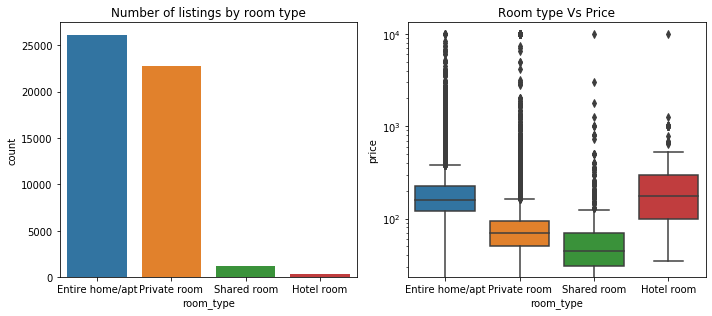

In [39]:
plt.figure(figsize=(10,4.5))

plt.subplot(1,2,1)
sns.countplot("room_type" ,data=ny)
plt.title("Number of listings by room type")

#box plot of price by room_type
plt.subplot(1,2,2)
sns.boxplot(x="room_type",y= "price", data= ny)
plt.yscale("log")
plt.title("Room type Vs Price")
plt.tight_layout() # to make automatic padding  
plt.show()

## Neighbourhood group 

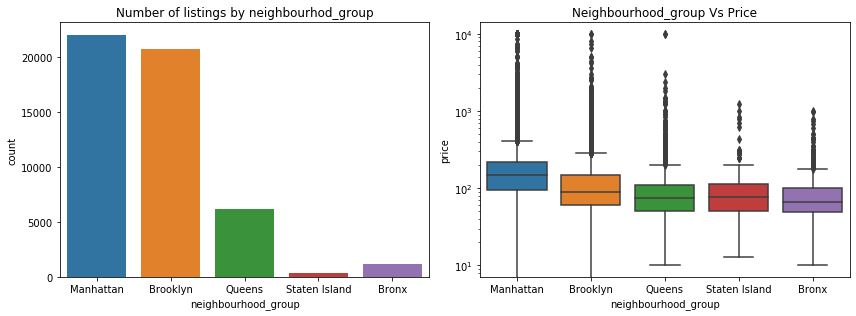

In [45]:
plt.figure(figsize=(12,4.5))
plt.subplot(1,2,1)
sns.countplot("neighbourhood_group" ,data=ny)
plt.title("Number of listings by neighbourhod_group")
#box plot of price by room_type
plt.subplot(1,2,2)
sns.boxplot(x="neighbourhood_group",y= "price", data= ny)
plt.yscale("log")
plt.title("Neighbourhood_group Vs Price")
plt.tight_layout() # to make automatic padding  


Text(0.5, 1.0, 'Room type Vs Price colored by neighbourhood_group')

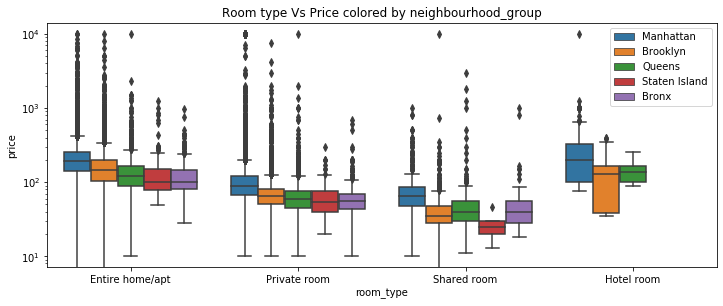

In [56]:
plt.figure(figsize=(12,4.5))
sns.boxplot(x="room_type",y= "price", data= ny, hue="neighbourhood_group")
plt.yscale("log")
plt.legend(loc= "upper right")
plt.title("Room type Vs Price colored by neighbourhood_group")

In [61]:
ny.groupby("neighbourhood_group")["id"].count()/ny.shape[0]

neighbourhood_group
Bronx            0.024012
Brooklyn         0.409890
Manhattan        0.436175
Queens           0.122453
Staten Island    0.007471
Name: id, dtype: float64

In [62]:
0.40989 +   0.436175

0.846065

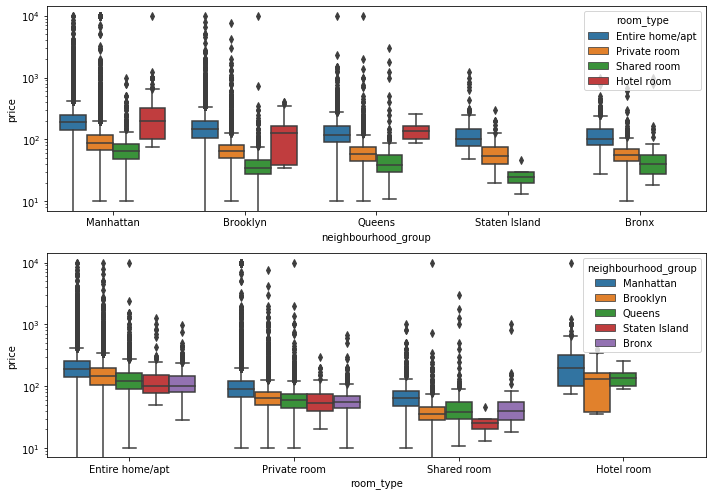

In [54]:
# box plot of price by neighbourhood_group
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
sns.boxplot(x="neighbourhood_group",y= "price", data= ny, hue="room_type")
#plt.title("Neighbourhood_group Vs Price")
plt.yscale("log")

#box plot of price by room_type
plt.subplot(2,1,2)
sns.boxplot(x="room_type",y= "price", data= ny, hue="neighbourhood_group")
plt.yscale("log")
#plt.title("Room type Vs Price")
plt.tight_layout() # to make automatic padding  

## Minimum nights

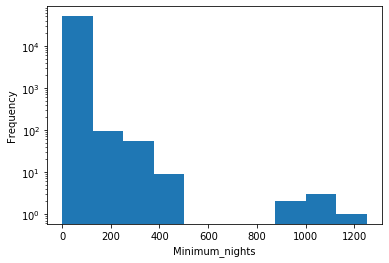

In [64]:
ny["minimum_nights"].plot(kind="hist")
_=plt.yscale("log") # log scale
_=plt.xlabel("Minimum_nights")

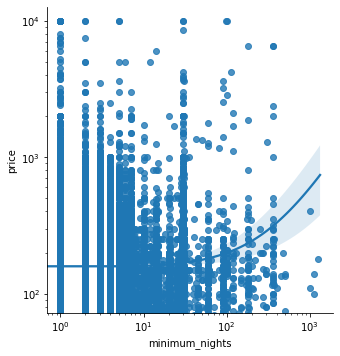

In [69]:
sns.lmplot("minimum_nights", y="price", data=ny)
plt.xscale("log")
plt.yscale("log")

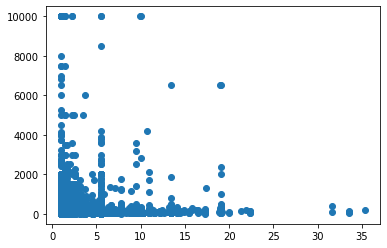

In [74]:
_=plt.scatter(np.sqrt(ny.minimum_nights), ny.price)
#plt.xscale("log")
#plt.yscale("log")

In [96]:
sub_data= ny.drop(["id", "host_id","latitude", "longitude"], axis=1)

C:\Users\tayeh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\tayeh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


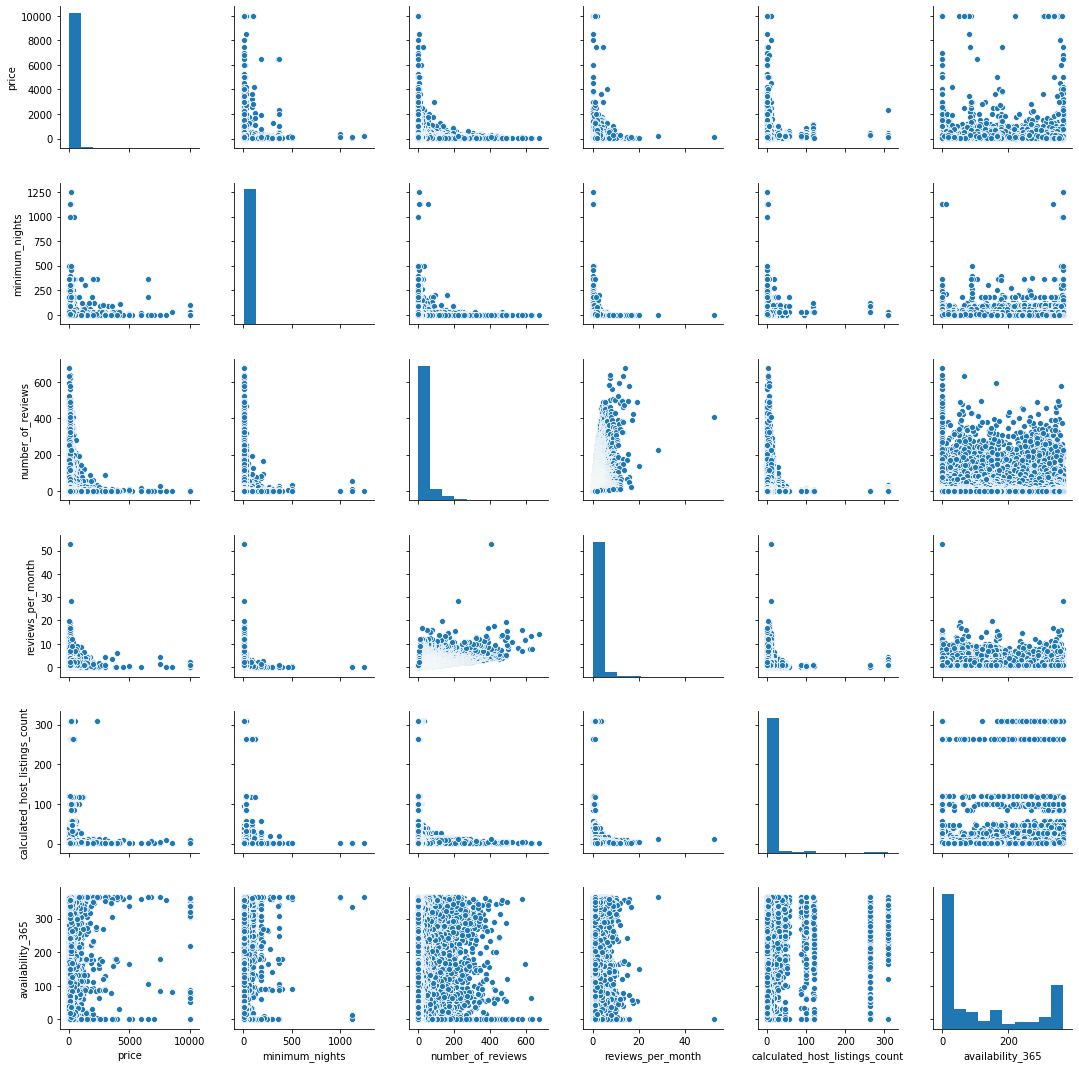

In [97]:
sns.pairplot(sub_data)

## Number of reviews

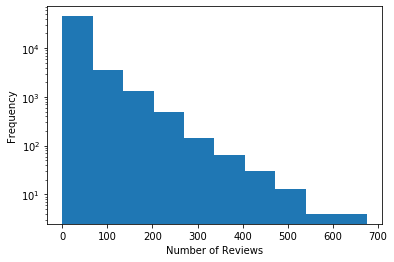

In [154]:
ny["number_of_reviews"].plot(kind="hist")
_=plt.yscale("log") # log scale
_=plt.xlabel("Number of Reviews")

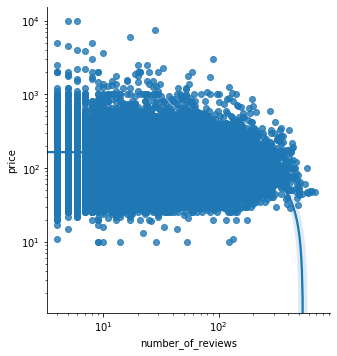

In [98]:
sns.lmplot("number_of_reviews", y="price", data=ny)
plt.xscale("log")
plt.yscale("log")

## Availablity 365 days

In [180]:
a360= ny[ny["availability_365"]<42]  # busy most of the time, median as a refrence
anot= ny[ny["availability_365"]>225] # not busy , 75% quartile as a refrence 
middle= ny[(ny["availability_365"]<=225) & (ny["availability_365"]>=42)] # middel

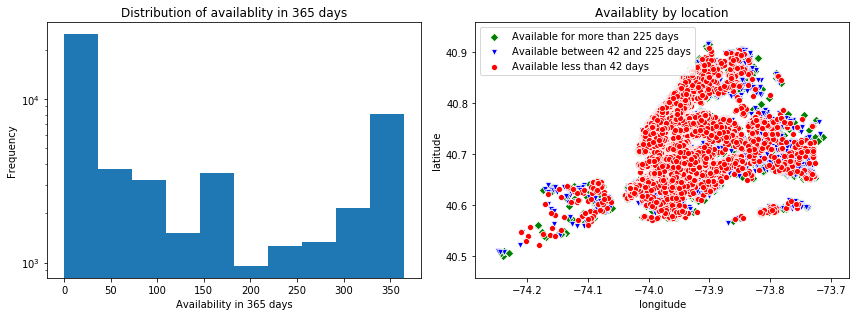

In [188]:
plt.figure(figsize=(12,4.5))

plt.subplot(121)
ny["availability_365"].plot(kind="hist")
_=plt.yscale("log") # log scale
_=plt.xlabel("Availability in 365 days")
_=plt.title("Distribution of availablity in 365 days")

plt.subplot(122)
sns.scatterplot("longitude", "latitude", data= anot, color="green", marker="D", label="Available for more than 225 days") # not busy area
sns.scatterplot("longitude", "latitude", data= middle, color="blue", marker="v", label="Available between 42 and 225 days") # middle area
sns.scatterplot("longitude", "latitude", data= a360, color="red",label="Available less than 42 days" ) # busy area

plt.legend(loc="upper left")
plt.title("Availablity by location")
plt.tight_layout()
plt.show()


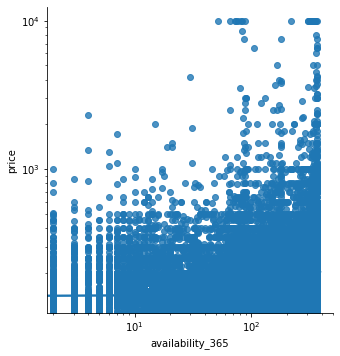

In [140]:
sns.lmplot("availability_365", y="price", data=ny)
plt.xscale("log")
plt.yscale("log")